# Hackathon 1: Python, ETL and Visualisation

## Objective

* Investigate and identify all outliers within the dataset.
* Transform the dataset so it's ready for feature engineering.

### Import Packages

In [2]:
import pandas as pd
import numpy as np

The healthcare insurance dataset will be read and loaded into a DataFrame, so the outliers can be investigated. 

In [4]:
df = pd.read_csv('../data/inputs/cleaned_data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


A random sample of the dataset has been highlighted to enable better inspection.

In [5]:
df.sample(n=4, random_state=28)

,age,sex,bmi,children,smoker,region,charges
1195,19,female,30.020,0,yes,northwest,33307.55080
91,53,female,24.795,1,no,northwest,10942.13205
217,27,male,23.100,0,no,southeast,2483.73600
470,27,male,32.670,0,no,southeast,2497.03830


The loaded dataset will be checked for data types, to ensure they are categorised correctly.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking that all duplicates were succesfully removed in the previous cleaning stage.

In [8]:
df.duplicated().sum()

0

The Matplotlib and Seaborn libraries will now be imported to investigate and deal with any potential outliers in the dataset.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

A box plot for each relevant column will be created to identify if there are any outliers. The dataset will also be checking for the mean and standard deviation.

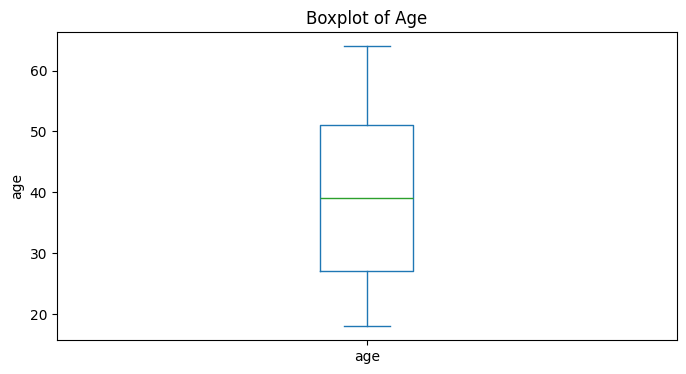

In [10]:
plt.figure(figsize=(8, 4))
df['age'].plot(kind='box')
plt.title('Boxplot of Age')
plt.ylabel('age')
plt.show()

In [17]:
mean_age = df['age'].mean()
std_dev_age = df['age'].std()
print(f"Mean Age: {mean_age}")
print(f"Standard Deviation of Age: {std_dev_age}")

Mean Age: 39.222139117427076
Standard Deviation of Age: 14.044332734156425


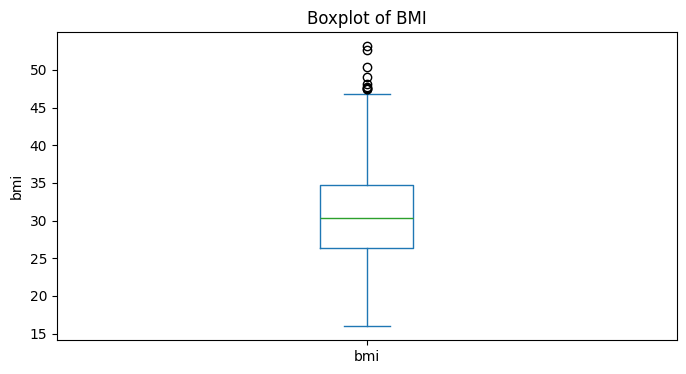

In [11]:
plt.figure(figsize=(8, 4))
df['bmi'].plot(kind='box')
plt.title('Boxplot of BMI')
plt.ylabel('bmi')
plt.show()

In [18]:
mean_bmi = df['bmi'].mean()
std_dev_bmi = df['bmi'].std()
print(f"Mean BMI: {mean_bmi}")
print(f"Standard Deviation of BMI: {std_dev_bmi}")

Mean BMI: 30.66345175766642
Standard Deviation of BMI: 6.100468409615801


Outliers identified for BMI, however it's not a cause for concern as the outliers represent individuals whose BMI's are clinically out of range.

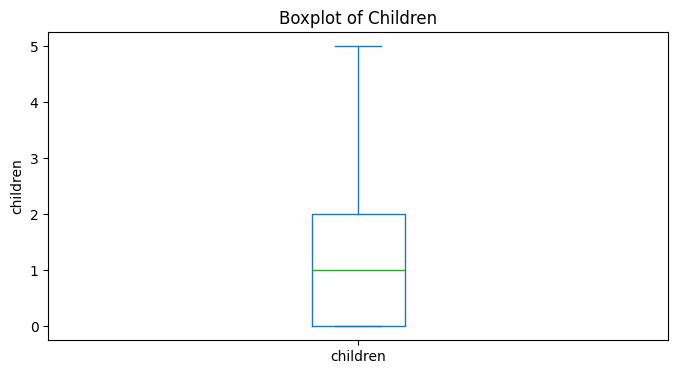

In [13]:
plt.figure(figsize=(8, 4))
df['children'].plot(kind='box')
plt.title('Boxplot of Children')
plt.ylabel('children')      
plt.show()

In [19]:
mean_age = df['age'].mean()
std_dev_age = df['age'].std()
print(f"Mean Age: {mean_age}")
print(f"Standard Deviation of Age: {std_dev_age}")

Mean Age: 39.222139117427076
Standard Deviation of Age: 14.044332734156425


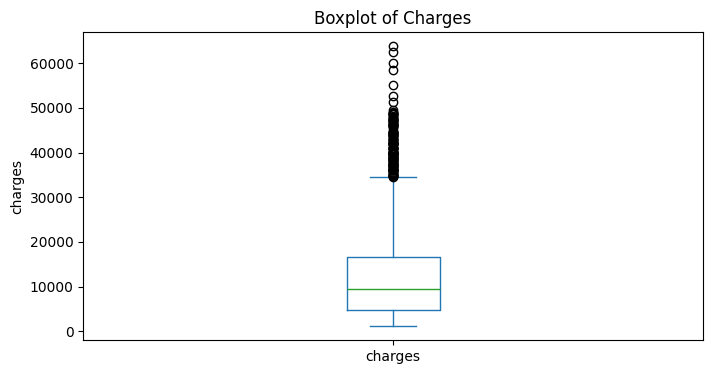

In [14]:
plt.figure(figsize=(8, 4))      
df['charges'].plot(kind='box')
plt.title('Boxplot of Charges')
plt.ylabel('charges')
plt.show()

The identified outliers indicate that some individuals within the dataset have much higher charges than the average.

In [20]:
mean = df['charges'].mean()
std_dev = df['charges'].std()
print(f"Mean: {mean}, Standard Deviation: {std_dev}")

Mean: 13279.121486655948, Standard Deviation: 12110.359656344175


The bounds will now be set for the charges variable, so outliers can be identified based on the standard deviation.

In [21]:
upper_bound = mean + std_dev * 3
lower_bound = mean - std_dev * 3
print(f"Upper Bound: {upper_bound}, Lower Bound: {lower_bound}")

Upper Bound: 49610.20045568847, Lower Bound: -23051.95748237658


Lower bound will be set to 0.

In [22]:
outliers_based_on_std_dev = df[df['charges']> upper_bound]
outliers_based_on_std_dev

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
818,33,female,35.530,0,yes,northwest,55135.40209
1145,60,male,32.800,0,yes,southwest,52590.82939
1229,52,male,34.485,3,yes,northwest,60021.39897
1299,45,male,30.360,0,yes,southeast,62592.87309


In [25]:
median = df['charges'].median()
std_dev = df['charges'].std()
print(f"Median: {median}, Standard Deviation: {std_dev}")

Median: 9386.1613, Standard Deviation: 12110.359656344175


In [26]:
upper_bound = median + std_dev * 3
lower_bound = median - std_dev * 3
print(f"Upper Bound: {upper_bound}, Lower Bound: {lower_bound}")

Upper Bound: 45717.240269032525, Lower Bound: -26944.917669032526


Lower bound will be set to 0.

In [28]:
outliers_based_on_std_dev = df[df['charges']> upper_bound]
outliers_based_on_std_dev
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


As all outliers were kept in the dataset, calculating the median to use for future visualisation is preferred as the data is less skewed. 